core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']
c:\Users\dilau\Desktop\TeamProjF1\FASTF1\.venv\Lib\site-packa

DRS activation points for HAM on lap 3:
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
Name: DRS, dtype: int64


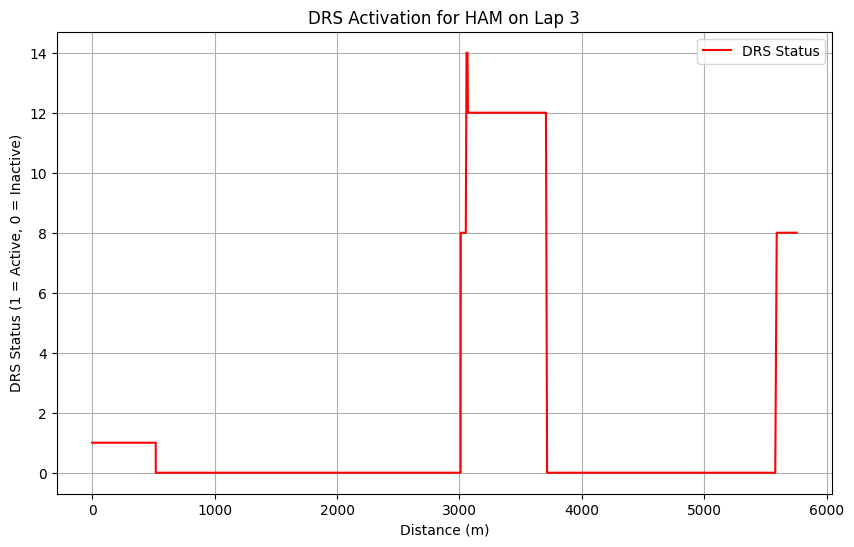

DRS activation zones for HAM on lap 3:
Zone: 0m to 519m


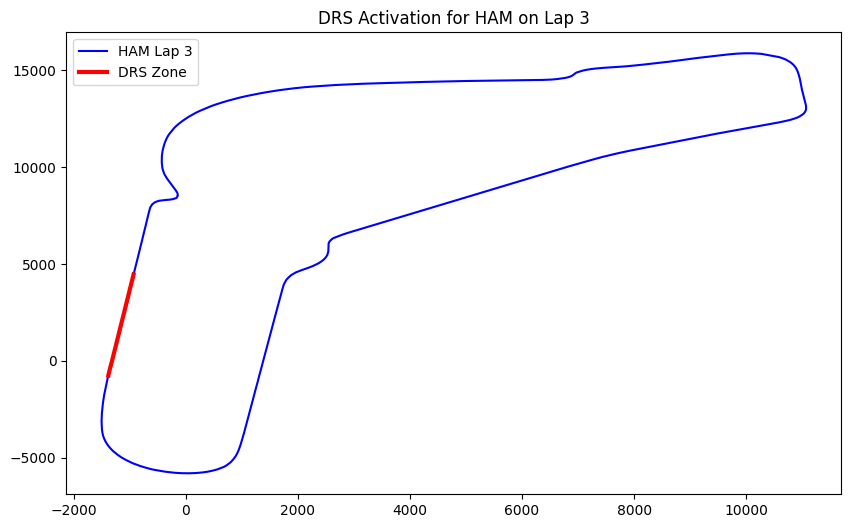

In [13]:
import fastf1
import matplotlib.pyplot as plt

# Enable cache (optional)
# fastf1.Cache.enable_cache('cache')

# Define the session details
year = 2023
gran_prix = "Monza"
sessionG = 'R'  # Race session
driver = "HAM"  # Driver to analyze
lap_number = 3  # Lap to analyze

# Load the race session
session = fastf1.get_session(year, gran_prix, sessionG)
session.load()

# Get the lap for the specified driver and lap number
lap = session.laps.pick_driver(driver).pick_lap(lap_number).iloc[0]

# Get telemetry data for the lap
telemetry = lap.get_telemetry()

# Extract DRS status
drs_status = telemetry["DRS"]

# Print DRS activation points
print(f"DRS activation points for {driver} on lap {lap_number}:")
print(drs_status[drs_status == 1])

# Plot DRS activation over distance
plt.figure(figsize=(10, 6))
plt.plot(telemetry["Distance"], drs_status, label="DRS Status", color="red")
plt.xlabel("Distance (m)")
plt.ylabel("DRS Status (1 = Active, 0 = Inactive)")
plt.title(f"DRS Activation for {driver} on Lap {lap_number}")
plt.legend()
plt.grid()
plt.show()

# Identify DRS activation zones
drs_zones = telemetry[telemetry["DRS"] == 1]

# Print the start and end of DRS activation zones
print(f"DRS activation zones for {driver} on lap {lap_number}:")
for zone in drs_zones.groupby((drs_zones.index.to_series().diff() > 1).cumsum()):
    start_distance = zone[1]["Distance"].min()
    end_distance = zone[1]["Distance"].max()
    print(f"Zone: {start_distance:.0f}m to {end_distance:.0f}m")

# Plot DRS activation on the track layout
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the driver's trajectory
ax.plot(telemetry["X"], telemetry["Y"], label=f"{driver} Lap {lap_number}", color="blue")

# Highlight DRS activation zones
for zone in drs_zones.groupby((drs_zones.index.to_series().diff() > 1).cumsum()):
    start_idx = zone[1].index[0]
    end_idx = zone[1].index[-1]
    ax.plot(telemetry.loc[start_idx:end_idx, "X"], telemetry.loc[start_idx:end_idx, "Y"], color="red", linewidth=3, label="DRS Zone")

plt.title(f"DRS Activation for {driver} on Lap {lap_number}")
plt.legend()
plt.show()